In [4]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [8]:
# Load the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize the data
X_train, X_test = X_train / 255, X_test / 255

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4506 - accuracy: 0.4786 - val_loss: 1.2105 - val_accuracy: 0.5707
Epoch 2/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.0943 - accuracy: 0.6158 - val_loss: 1.0779 - val_accuracy: 0.6146
Epoch 3/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9638 - accuracy: 0.6657 - val_loss: 0.9878 - val_accuracy: 0.6577
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8786 - accuracy: 0.6940 - val_loss: 0.9410 - val_accuracy: 0.6753
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8090 - accuracy: 0.7191 - val_loss: 0.9373 - val_accuracy: 0.6841
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7499 - accuracy: 0.7397 - val_loss: 0.8992 - val_accuracy: 0.6910
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6997 - accuracy: 0.7554 - val_loss: 0.9568 - val_

In [9]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

313/313 - 1s - loss: 0.9576 - accuracy: 0.6945 - 686ms/epoch - 2ms/step
Test accuracy: 0.6945000290870667


313/313 [==============================] - 1s 3ms/step


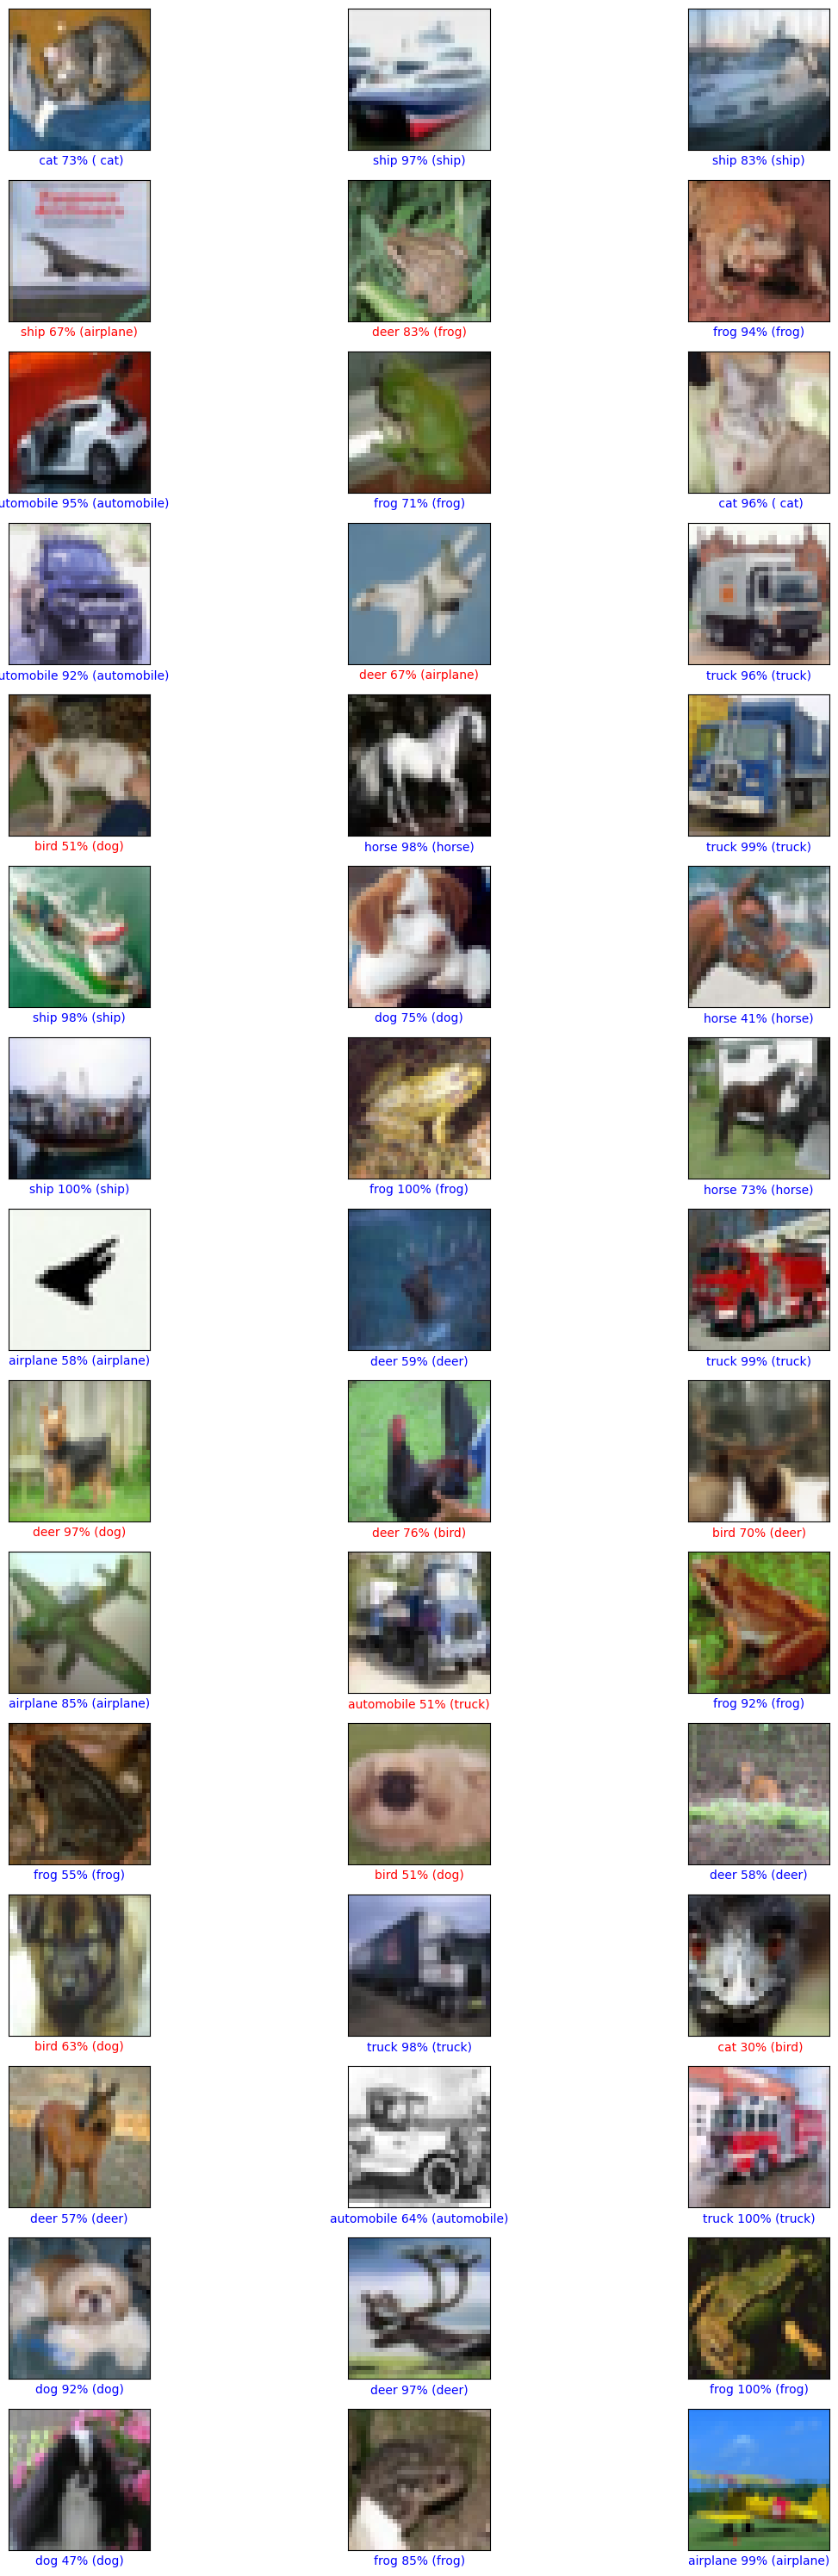

In [12]:
import numpy as np
import matplotlib.pyplot as plt

predictions = model.predict(X_test)

class_names = ['airplane', 'automobile', 'bird', ' cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def plot_image(i, predictions_array, true_label, img):
    true_label = true_label[i][0] if len(true_label[i]) > 0 else true_label[i]
    img = img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(
        class_names[predicted_label],
        100*np.max(predictions_array),
        class_names[true_label]),
        color=color
    )

num_rows = 15
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], y_test, X_test)
plt.tight_layout()
plt.show()
